#### Roll No. : J014
#### Name : Ankita Dasgupta
#### Machine Learning Assignment 3 
#### Linear Regression

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Univariate Linear Regression

In [218]:
data = pd.read_csv("Data/ex1data1.txt", header=None)
data.columns = ['Population', 'Profit']
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [219]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


#### Scatter Plot for Profit vs Population

Text(0.5, 1.0, 'Profit vs Population')

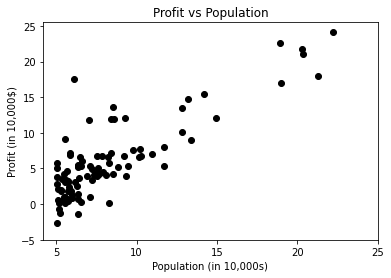

In [220]:
plt.scatter(data['Population'], data['Profit'], color = 'black')
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel('Population (in 10,000s)')
plt.ylabel('Profit (in 10,000$)')
plt.title('Profit vs Population')

#### Cost Function J(θ)

In [17]:
def computeCost(x,y,theta):
    """
    Take in a numpy arary x,y,theta and get cost function using theta as parameter in a linear regression model
    """
    m = len(y)
    predictions = x.dot(theta)
    square_err = (predictions - y)**2
    
    return (1/(2*m))*np.sum(square_err)

#### Assigning Values to x,y,0 and Reshaping the Data

In [3]:
data['x0'] = 1
data_val = data.values
m =  len(data_val[:-1])
x = data[['x0','Population']].iloc[:-1].values
y = data['Profit'][:-1].values.reshape(m,1)
theta = np.zeros((2,1))

m, x.shape, y.shape, theta.shape

NameError: name 'data' is not defined

h(θ) = x0θ0 +x1θ1 ....(x0 = 1)

In [223]:
data.head()

,Population,Profit,x0
0,6.1101,17.5920,1
1,5.5277,9.1302,1
2,8.5186,13.6620,1
3,7.0032,11.8540,1
4,5.8598,6.8233,1


In [224]:
computeCost(x,y,theta)

64.80968355754062

#### Gradient Descent
Function that works for both Univariate and Multivariate Data

In [4]:
def gradientDescent(x,y,theta,alpha,num_iters):
    """
    Take numpy array for x,y,theta and update theta for every iteration of gradient steps
    Breaks the loop as soon as minimization is finished with a precision of 0.00000001
    
    return theta and the list of cost of theta during each iteration
    """
    
    m = len(y)
    precision = 0.00000001
    J_history = []
    for i in range(num_iters):
        predictions = np.dot(x, theta)
        error = np.dot(x.T, (predictions-y))
        descent = alpha * (1/m) * error
        theta = theta - descent
        cost = computeCost(x,y,theta)
        J_history.append(cost)
        if i >= 2 and (cost > J_history[-2] or precision > abs(J_history[-2] - cost)):
            break
    return theta, J_history

In [18]:
theta, J_history = gradientDescent(x , y, theta,0.001, 2000)

In [19]:
print(f"h(x) = {str(round(theta[0,0],2))} + {str(round(theta[1,0],2))}x1")

h(x) = 0.21 + 0.88x1


#### Surface Plot for Gradient Descent

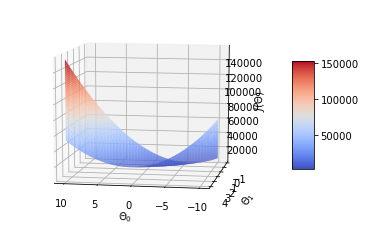

In [228]:
from mpl_toolkits.mplot3d import Axes3D
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(x,y,t)
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
#rotate for better angle
ax.view_init(10,100)

#### Plot for Cost Function 

Text(0.5, 1.0, 'Cost function using Gradient Descent')

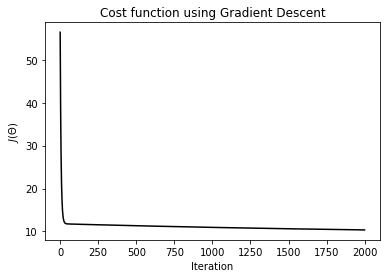

In [229]:
plt.plot(J_history, color = 'black')
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Text(0.5, 1.0, 'Profit vs Population')

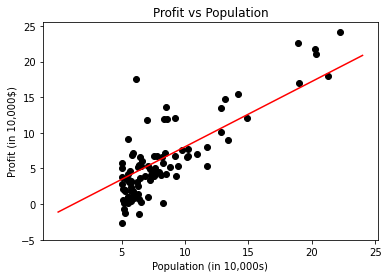

In [230]:
plt.scatter(data['Population'], data['Profit'], color = 'black')
x_value = [x for x in range(25)]
y_value = [x*theta[1] + theta[0] for x in x_value]
plt.plot(x_value, y_value, color = 'r')
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel('Population (in 10,000s)')
plt.ylabel('Profit (in 10,000$)')
plt.title('Profit vs Population')

#### Prediction Function

In [14]:
def predict(x,theta):
    """
    takes in numpy array x and theta and returns predicted value of y
    """
    predictions = np.dot(x, theta)
    return predictions

In [232]:
data.tail(1)

,Population,Profit,x0
96,5.4369,0.61705,1


In [233]:
predict1 = predict(data[['x0','Population']].iloc[-1].values, theta)*10000
print('For a population of 6170 the predicted profit is $',predict1)

For a population of 6170 the predicted profit is $ [38686.24610338]


### Multivariate Linear Regression

In [5]:
data2 = pd.read_csv("Data/ex1data2.txt", header=None)
data2.columns = ['size_of_house', 'bedrooms', 'price']
data2.head()

,size_of_house,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   size_of_house  47 non-null     int64
 1   bedrooms       47 non-null     int64
 2   price          47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [7]:
data2.describe()

,size_of_house,bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


#### Scatter Plot for Size of House vs Price

Text(0.5, 1.0, 'Price vs Size of House')

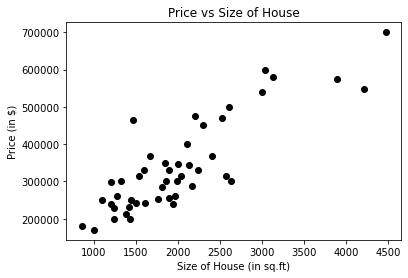

In [8]:
plt.scatter(data2['size_of_house'], data2['price'], color = 'black')
plt.xlabel('Size of House (in sq.ft)')
plt.ylabel('Price (in $)')
plt.title('Price vs Size of House')

#### Scatter Plot for Size of House vs Price

Text(0.5, 1.0, 'Price vs Size of House')

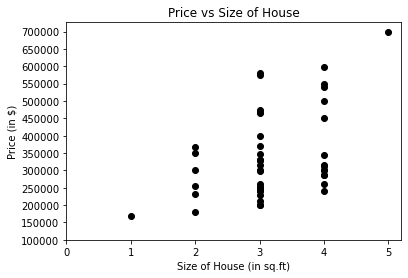

In [9]:
plt.scatter(data2['bedrooms'], data2['price'], color = 'black')
plt.yticks(np.arange(100000,700001,step=50000))
plt.xticks(np.arange(0,6,step=1))
plt.xlabel('Size of House (in sq.ft)')
plt.ylabel('Price (in $)')
plt.title('Price vs Size of House')

#### Scaling the data using Standardisation

In [10]:
from sklearn import preprocessing
col = ['size_of_house', 'price']
scaler = preprocessing.StandardScaler()
data2[col] = pd.DataFrame(scaler.fit_transform(data2[col]),columns = data2[col].columns)
data2.head()

,size_of_house,bedrooms,price
0,0.131415,3,0.480890
1,-0.509641,3,-0.084983
2,0.507909,3,0.231097
3,-0.743677,2,-0.876398
4,1.271071,4,1.612637


In [11]:
# Loading vectors x and y
x = np.array(data2.drop('price', axis = 1)[:-1])
y = np.array(data2['price'][:-1])
print(x.shape, y.shape)
# Reshaping the data
# Adding x0 to the matrix
x = np.c_[np.ones(x.shape[0]),x]
y = y.reshape(y.shape[0],1)
print(x.shape, y.shape)

(46, 2) (46,)
(46, 3) (46, 1)


In [12]:
# Assigning initial theta values
theta = np.zeros((3,1))
theta.shape

(3, 1)

In [20]:
import time
# Performing Regression
alpha = 0.01
itr = 50000
start = time.time()
theta, J_history = gradientDescent(x, y, theta, alpha, itr)
predictions = predict(x, theta)
end = time.time() - start
print(f"h(x) = {str(round(theta[0,0],2))} + {str(round(theta[1,0],2))}x1 {str(round(theta[2,0],2))}x2")
print("Cost Calculation Time: ", end)

h(x) = 0.21 + 0.88x1 -0.07x2
Cost Calculation Time:  0.0009701251983642578


In [21]:
from sklearn.metrics import r2_score

print("Accuracy: ", round(r2_score(y, predictions)*100, 3))

Accuracy:  72.912


In [22]:
scaler.inverse_transform(data2[col])

array([[  2104., 399900.],
       [  1600., 329900.],
       [  2400., 369000.],
       [  1416., 232000.],
       [  3000., 539900.],
       [  1985., 299900.],
       [  1534., 314900.],
       [  1427., 198999.],
       [  1380., 212000.],
       [  1494., 242500.],
       [  1940., 239999.],
       [  2000., 347000.],
       [  1890., 329999.],
       [  4478., 699900.],
       [  1268., 259900.],
       [  2300., 449900.],
       [  1320., 299900.],
       [  1236., 199900.],
       [  2609., 499998.],
       [  3031., 599000.],
       [  1767., 252900.],
       [  1888., 255000.],
       [  1604., 242900.],
       [  1962., 259900.],
       [  3890., 573900.],
       [  1100., 249900.],
       [  1458., 464500.],
       [  2526., 469000.],
       [  2200., 475000.],
       [  2637., 299900.],
       [  1839., 349900.],
       [  1000., 169900.],
       [  2040., 314900.],
       [  3137., 579900.],
       [  1811., 285900.],
       [  1437., 249900.],
       [  1239., 229900.],
 

In [24]:
# Predicting Value
data2['x0'] = 1
data2.tail(1)

,size_of_house,bedrooms,price,x0
46,-1.0146,3,-0.815769,1


In [33]:
predict2 = predict(data2[['x0','size_of_house','bedrooms']].iloc[-1].values, theta)
print(scaler.inverse_transform([int(data2['size_of_house'].iloc[-1]),predict2]))
size, predict3 = scaler.inverse_transform([int(data2['size_of_house'].iloc[-1]),predict2])
print('For a population of 6170 the predicted profit is $',predict3)

TypeError: 'numpy.ndarray' object is not callable

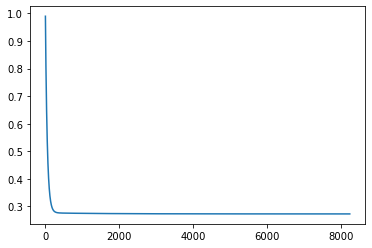

In [246]:
# Cost Graph
c = np.array((J_history))
c = c.reshape((c.size, 1))
plt.plot(c)
plt.show()

In [247]:
c.shape

(8243, 1)

Model learns the most in 8243 epochs.